In [60]:
#importing necesssary libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
#loading dataset 
df = pd.read_csv('C:/Users/kaurs/Downloads/Projects/sales_data_sample.csv',encoding ='ISO-8859-1')


In [10]:
#exploring dataset 
print(df.head())
print(df.info())
print(df.describe())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [11]:
#checking missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [13]:
#handling missing values
df.dropna(subset=['POSTALCODE'], inplace =True)

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2445
CITY                   0
STATE               1486
POSTALCODE             0
COUNTRY                0
TERRITORY            998
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [16]:
#imputing missing values in specific columns
df['ADDRESSLINE2'].fillna('NO Address Line 2',inplace = True)
df['STATE'].fillna('State',inplace = True)
df['TERRITORY'].fillna('UNKNOWN',inplace = True)
print(df.isnull().sum())

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


In [20]:
#data cleaning and preprocessing 
df_no_duplicates = df.drop_duplicates()
print(df_no_duplicates)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
5           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

      ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0    2003-02-24   Shipped       1     

In [25]:
#handling outliers. outliers are datapoints that significantly differ from the rest of data in dataset 
from scipy.stats import zscore
numeric_columns = ['QUANTITYORDERED','PRICEEACH','SALES']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors ='coerce')
z_scores = np.abs(zscore(df[numeric_columns]))
otlier_threshold = 3
outliers = np.where(z_scores >otlier_threshold)
df_no_outliers = df.drop(df.index[outliers[0]])
df[numeric_columns] = np.where(
    z_scores>otlier_threshold,
    np.nan,
    df[numeric_columns]
)
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [26]:
#feature Engineering
df['YEAR_MONTH'] = df['ORDERDATE'].dt.to_period('M')


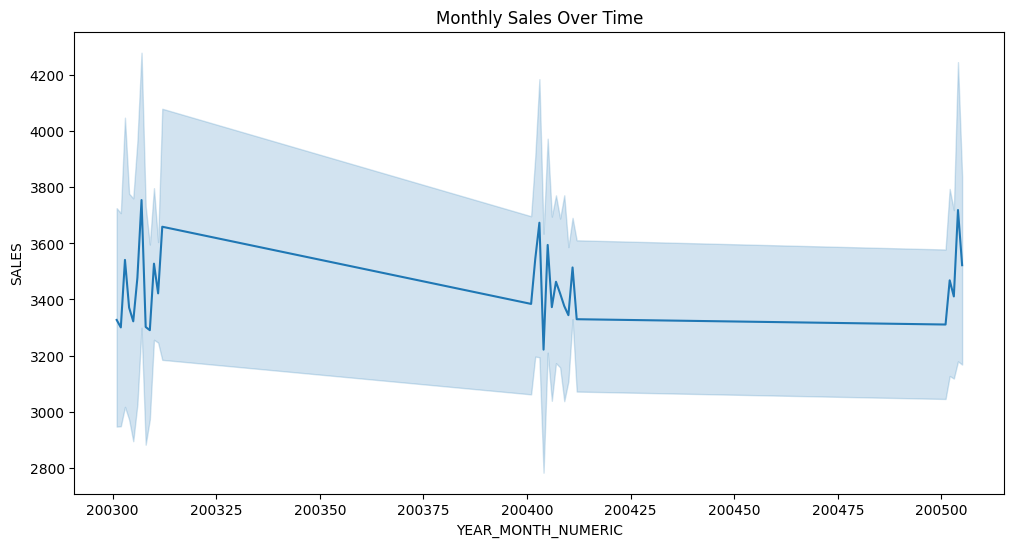

In [29]:
#Exploratory Data Analysis (EDA) 
#Visualizing sales over time
df['YEAR_MONTH_NUMERIC'] = df['YEAR_MONTH'].dt.strftime('%Y%m').astype(int)
plt.figure(figsize =(12,6))
sns.lineplot(x='YEAR_MONTH_NUMERIC', y = 'SALES',data=df)
plt.title('Monthly Sales Over Time')
plt.show()

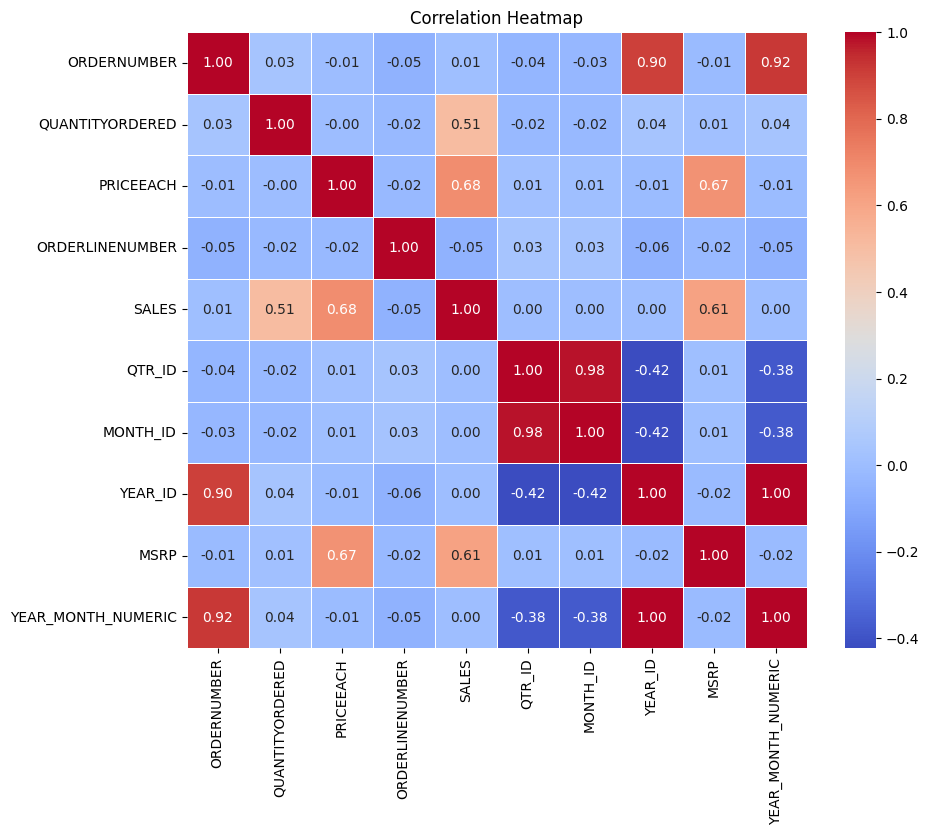

In [33]:
#Correlation Heatmap 
numeric_col = df.select_dtypes(include = ['number']).columns
correlation_matrix = df[numeric_col].corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot =True, cmap='coolwarm',fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

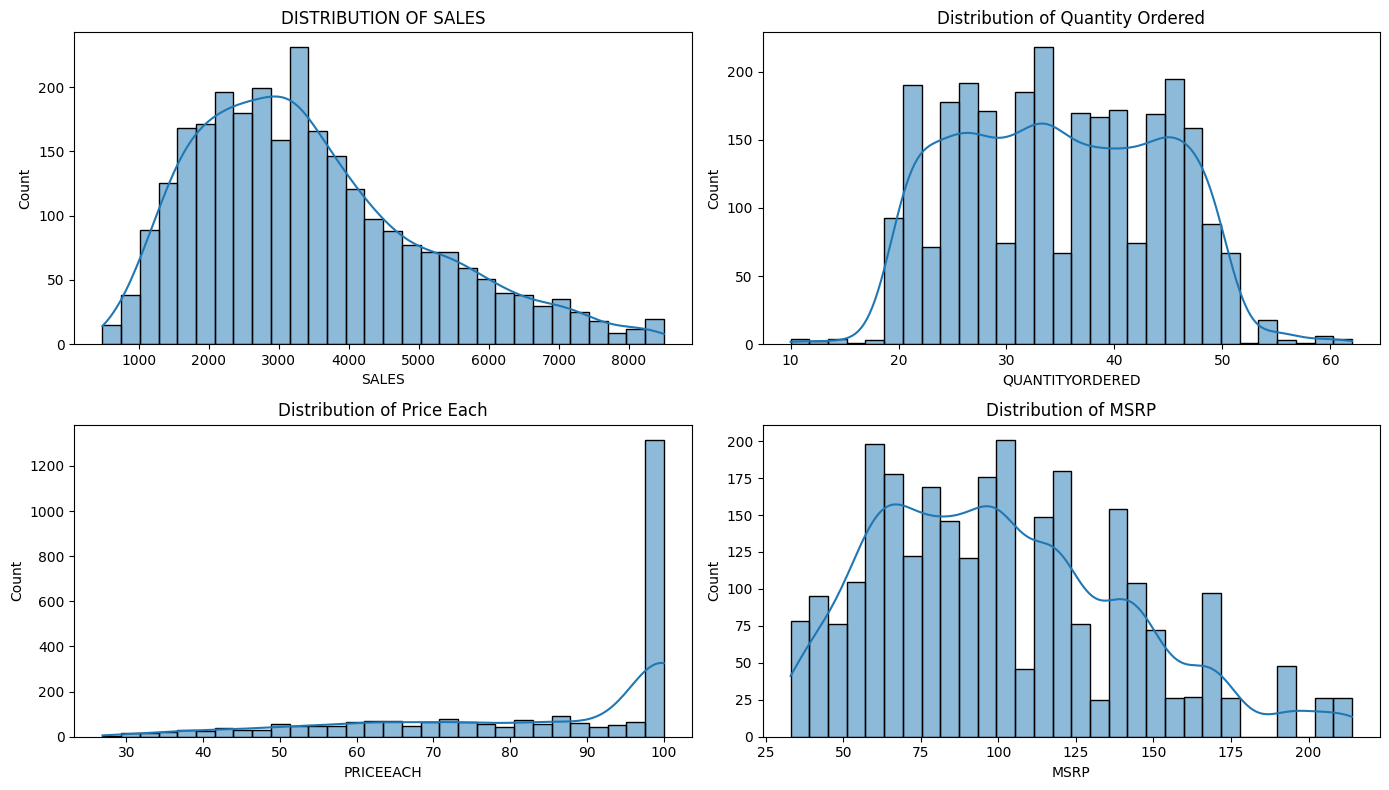

In [42]:
#distribution Analysis 
plt.figure(figsize=(14,8))

#distribution of sale
plt.subplot(2,2,1)
sns.histplot(df['SALES'], bins=30, kde=True)
plt.title('DISTRIBUTION OF SALES')

# Distribution of Quantity Ordered
plt.subplot(2, 2, 2)
sns.histplot(df['QUANTITYORDERED'], bins=30, kde=True)
plt.title('Distribution of Quantity Ordered')

# Distribution of Price Each
plt.subplot(2, 2, 3)
sns.histplot(df['PRICEEACH'], bins=30, kde=True)
plt.title('Distribution of Price Each')

# Distribution of MSRP
plt.subplot(2, 2, 4)
sns.histplot(df['MSRP'], bins=30, kde=True)
plt.title('Distribution of MSRP')

plt.tight_layout()
plt.show()


Model Evaluation
Mean Squared Error:  314331.17
R-squared: 0.76


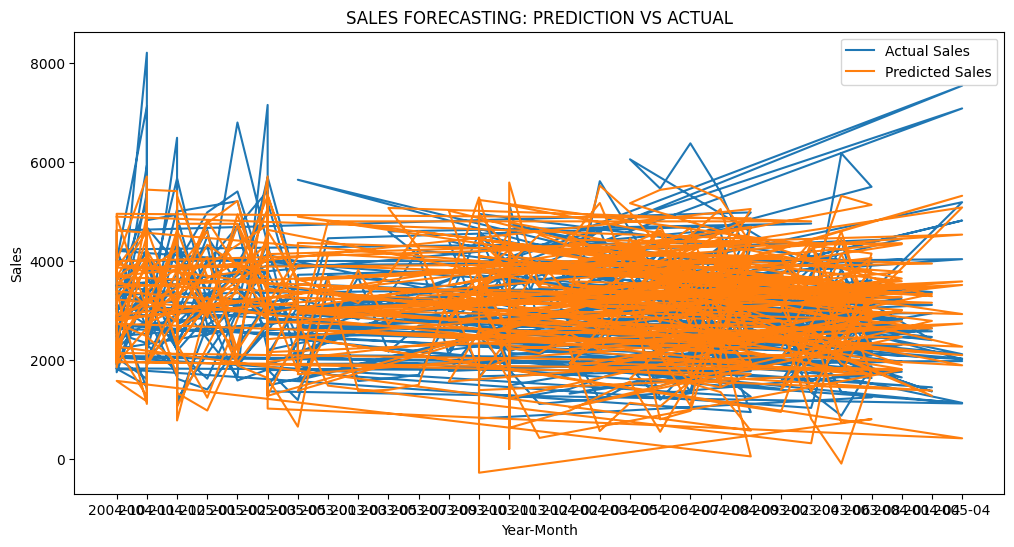

In [51]:
#Feature Selection
selected_features=['QUANTITYORDERED','PRICEEACH','MSRP']
train_size=int(len(df)*0.8)
train_data, test_data = df[:train_size],df[train_size:]
X_train, X_test = train_data[selected_features], test_data[selected_features]
Y_train, Y_test = train_data['SALES'],test_data['SALES']

model= LinearRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Model Evaluation")
print(f"Mean Squared Error: {mse: .2f}")
print(f"R-squared: {r2:.2f}")

plt.figure(figsize=(12,6))
plt.plot(test_data['YEAR_MONTH'].dt.strftime('%Y-%m'), Y_test, label ='Actual Sales')
plt.plot(test_data['YEAR_MONTH'].dt.strftime('%Y-%m'), y_pred, label ='Predicted Sales')
plt.title('SALES FORECASTING: PREDICTION VS ACTUAL')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

C:\Users\kaurs\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

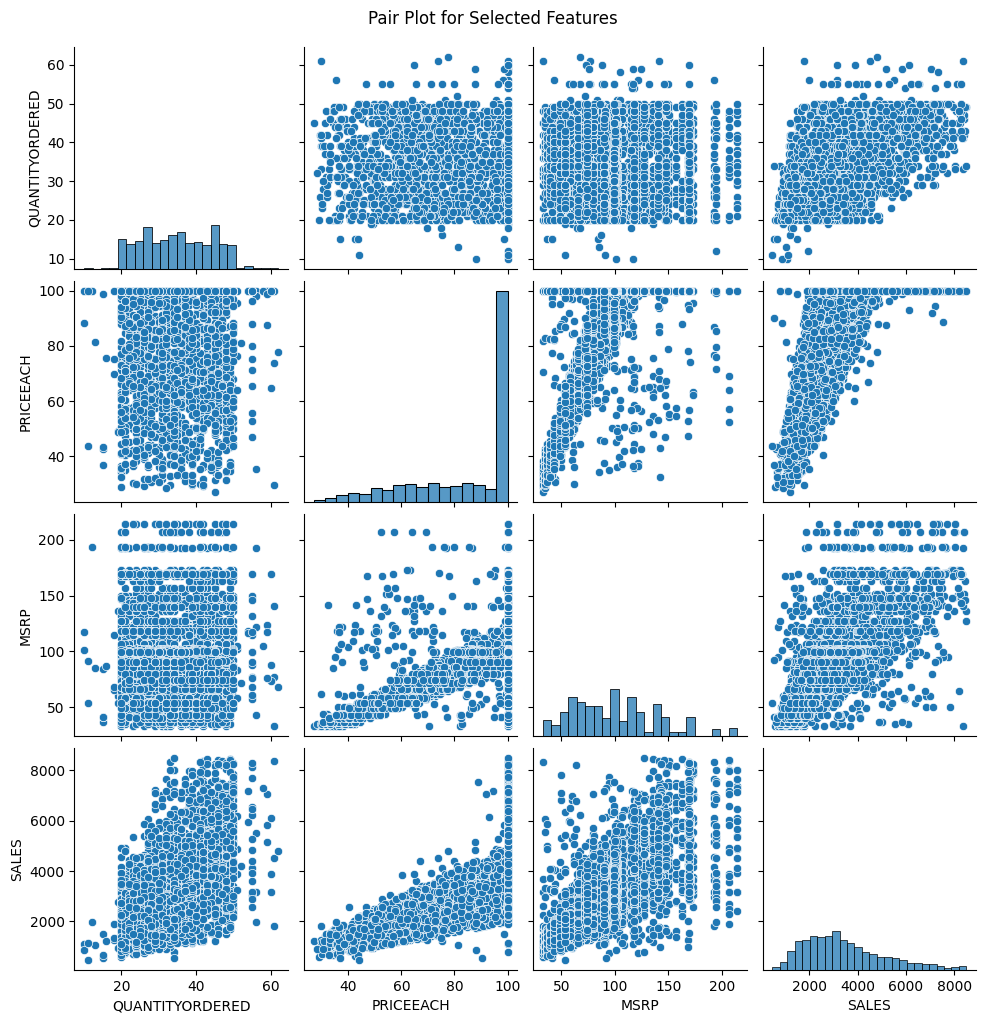

In [56]:
plt.figure(figsize=(12,6))
sns.pairplot(df[selected_features+['SALES']])
plt.suptitle("Pair Plot for Selected Features" ,y=1.02)
plt.show()

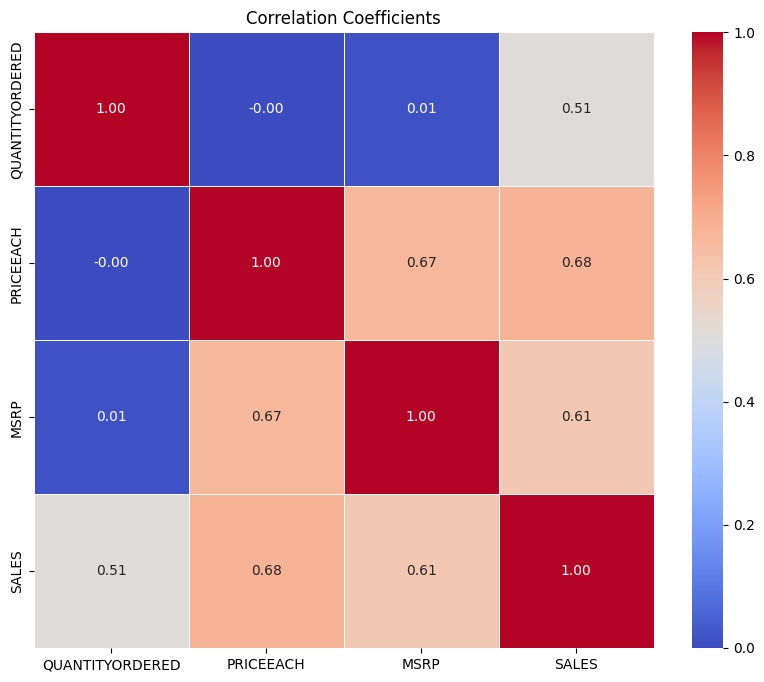

In [58]:
correlation_matrix = df[selected_features +['SALES']].corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt='.2f', linewidths = 0.5)
plt.title('Correlation Coefficients')
plt.show()

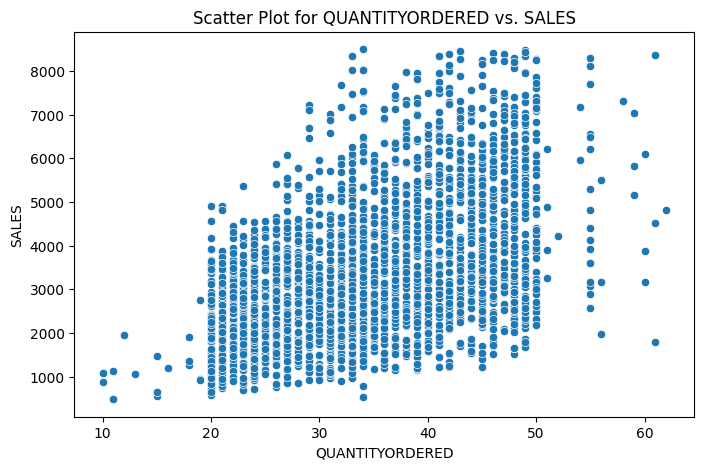

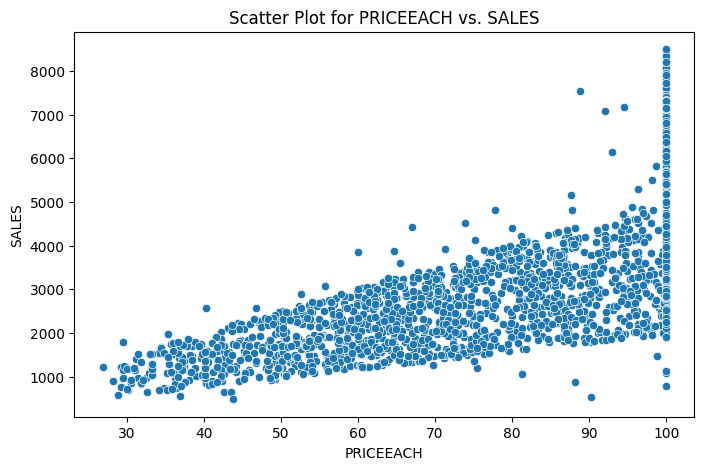

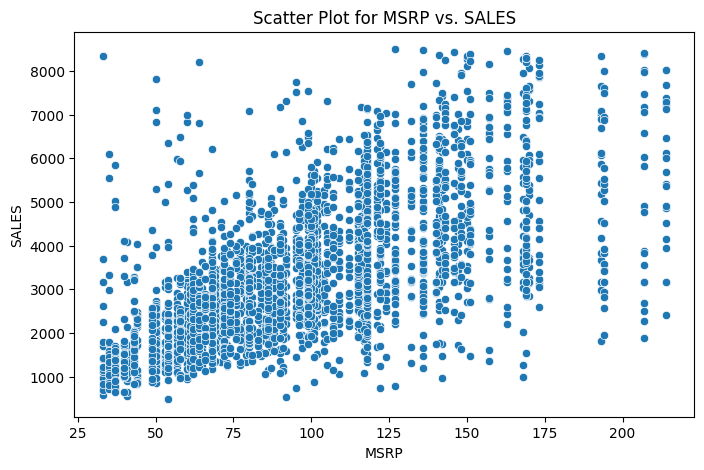

In [59]:
#scatter plot for each feature against the target variable 
for feature in selected_features:
    plt.figure(figsize = (8,5))
    sns.scatterplot(x=df[feature],y=df['SALES'])
    plt.title(f'Scatter Plot for {feature} vs. SALES')
    plt.show()

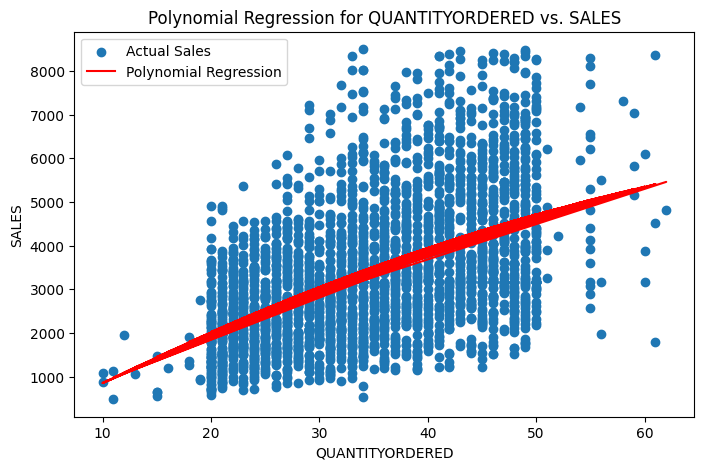

In [62]:
feature_of_interest= 'QUANTITYORDERED'
degree= 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
X_poly = df[[feature_of_interest]].values.reshape(-1,1)
model.fit(X_poly,df['SALES'])
y_pred_poly = model.predict(X_poly)
plt.figure(figsize=(8,5))
plt.scatter(df[feature_of_interest],df['SALES'],label ='Actual Sales')
plt.plot(df[feature_of_interest], y_pred_poly, color='red', label='Polynomial Regression')
plt.title(f'Polynomial Regression for {feature_of_interest} vs. SALES')
plt.xlabel(feature_of_interest)
plt.ylabel('SALES')
plt.legend()
plt.show()